## linear regression with one variable to predict the profits of bike sharing company

In [2]:
import matplotlib.pyplot as plt #plotting
plt.style.use('ggplot') #Making Plots With plotnine
%matplotlib inline

## regarding ggplot
Using ggplot in Python allows you to build visualizations incrementally, first focusing on your data and then adding and tuning components to improve its graphical representation.
## seaborn
is a wrapper over matplotlib

In [3]:
import numpy as np  #scientific computing
import pandas as pd  # for handling of data 
import seaborn as sns #plot_styling
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
data=pd.read_csv("bike_sharing_data.txt")

In [5]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [6]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


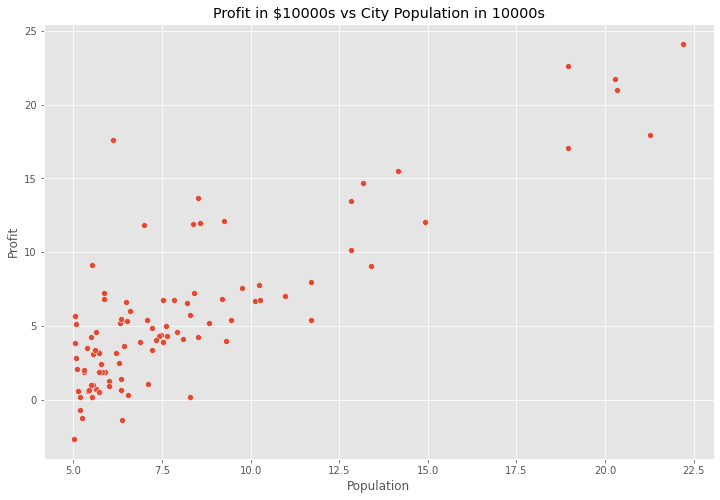

In [8]:
ax=sns.scatterplot(x="Population",y="Profit",data=data)
ax.set_title("Profit in $10000s vs City Population in 10000s");
#I'm using ; here so that loaction of method printed out as well

## we can see there is a general trend in the graph so what our model is going to is to find the best fit line to the graph, we assume that there is linear relation between population and profit then using best fit line we will predict the profit for unseen data of population

### Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

we can consider cost as error our model made while estimating the value
in our data we want to predict the profit 
here y^(i) is i-th training example of the profit h(theta) is models estimate of True profit
we are taking difference of estimated profit from model and profit from actual data then we sqaure it so that our model is robust to outliers so we do it over all the m values and then divide it by 2m
here x and y are not the scalar values but the rows and columms of our data set

### Gradient Descent is learning to minimise the cost function, it is a good practice to monitor the cost at each step
we will add ones to accomodate the intercept terms i.e. h(theta)1 while defining the values of x

In [9]:
def cost_function(x,y,theta):
    m=len(y)
    y_pred=x.dot(theta)
    error=(y_pred -y)**2
    
    
    return 1/(2*m) * np.sum(error)

In [10]:
m=data.Population.values.size
x=np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y=data.Profit.values.reshape(m,1)
theta=np.zeros((2,1))

In [11]:
cost_function(x,y,theta)

32.072733877455676

###  Gradient Descent
Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

so we want to minise the cost function one of the way of doing that is algorithm Gradient Descent
GD steps down the cost function in the direction of steepest descent and the size of each step is govern by alpha which is known as learning rate
    

In [18]:
def gradient_descent(x,y,theta, alpha,iterations):
    m=len(y)
    costs=[] #list of values of theta j values to let us revisit the theta value and
    #understand convergence of Gradient descent and visulaise how our model is working
    for i in range(iterations):
        y_pred=x.dot(theta)
        error= np.dot(x.transpose(),(y_pred-y))
        theta-=alpha*1/m*error
        costs.append(cost_function(x,y,theta))
    return theta,costs #values of j theta will dec with each step indicate GD is working correctly

In [28]:
theta,costs=gradient_descent(x,y,theta,alpha=0.01,iterations=2000)

print("h(x)={}+{}x1".format(str(round(theta[0,0],2)),
                           str(round(theta[1,0],2))))

h(x)=-3.89+1.19x1


### Visualising the Cost Function $J(\theta)$

In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [30]:
theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-1,4,100)

cost_values =np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i], theta_1[j]])
        
        cost_values[i,j]=cost_function(x,y,t)

C:\Users\mkhus\AppData\Local\Temp/ipykernel_12488/2850497947.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection="3d")


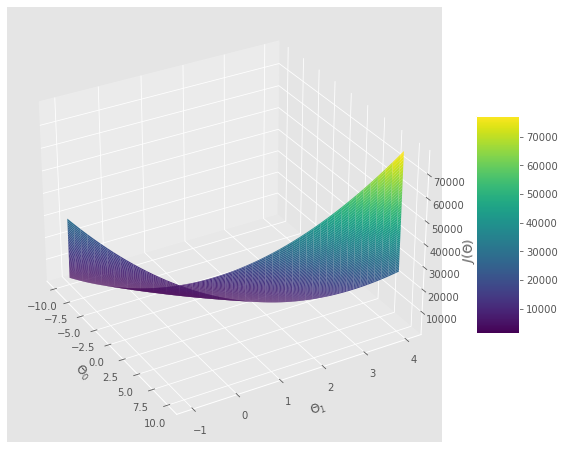

In [31]:
fig=plt.figure(figsize=(12,8))
ax=fig.gca(projection="3d")

surf=ax.plot_surface(theta_0, theta_1,cost_values,cmap="viridis")
fig.colorbar(surf,shrink=0.5,aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)

plt.show()

### Plotting the Convergence
Plot $J(\theta)$ against the number of iterations of gradient descent:

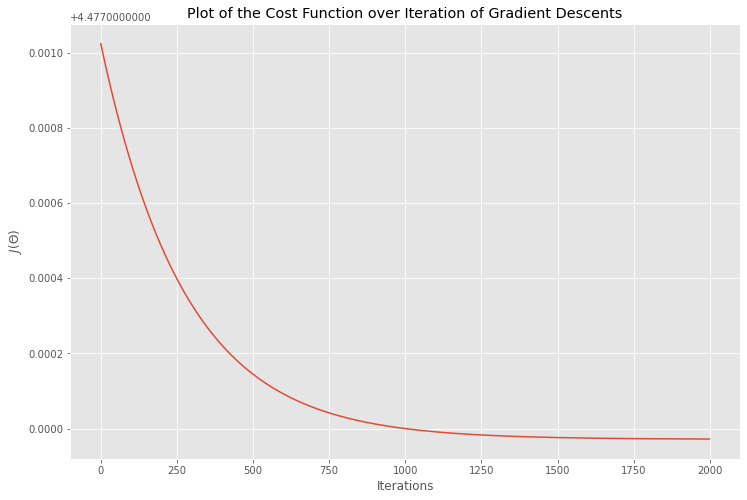

In [32]:
plt.plot(costs)

plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")

plt.title("Plot of the Cost Function over Iteration of Gradient Descents");


### Task 8: Training Data with Linear Regression Fit
---

In [33]:
theta.shape

(2, 1)

In [34]:
theta

array([[-3.89286253],
       [ 1.19274046]])

C:\Users\mkhus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


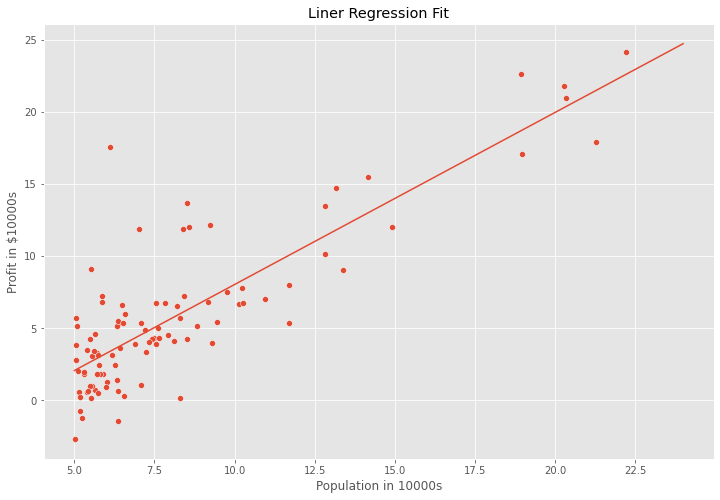

In [35]:
theta=np.squeeze(theta)
sns.scatterplot(x="Population",y="Profit", data=data)

x_value=[x for x in range(5,25)]
y_value=[(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Liner Regression Fit");

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [36]:
def predict(x,theta):
    y_pred=np.dot(theta.transpose(),x)
    return y_pred

In [37]:
y_pred_1=predict(np.array([1,4]),theta)*10000
print("For a population of 40,000 people, the model predicts a profit of $"+str(round(y_pred_1,0)))

For a population of 40,000 people, the model predicts a profit of $8781.0


In [38]:
y_pred_2=predict(np.array([1,8.3]),theta)*10000
print("For a population of 83,000 people, the model predicts a profit of $"+str(round(y_pred_2,0)))

For a population of 83,000 people, the model predicts a profit of $60069.0
